In [ ]:
# 📦 导入依赖
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('/home/llr/ilc/shi/code/Plot_style/cepc.mplstyle')
fig_size = (6, 6)
# 🔧 解码函数：根据 bitfield <id>calolayer:7,abslayer:1,cellid:13</id>
def decode_volid(volid):
    volid = int(volid)
    calolayer = volid & 0x7F                 # bits 0–6
    abslayer  = (volid >> 7) & 0x1           # bit 7
    cellid    = (volid >> 8) & 0x1FFF        # bits 8–20
    return calolayer, abslayer, cellid

# 🧮 从 cellid 解出 index_x/y/z（若 cellid = z*1600 + y*40 + x）
def decode_indices(cellid):
    index_z = cellid // 1600
    index_y = (cellid % 1600) // 40
    index_x = cellid % 40
    return index_x, index_y, index_z


/grid_mnt/data__DATA/data.polcalice/data/flc/shi/miniconda3/envs/my_notebook_env/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/grid_mnt/data__DATA/data.polcalice/data/flc/shi/miniconda3/envs/my_notebook_env/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/grid_mnt/data__DATA/data.polcalice/data/flc/shi/miniconda3/envs/my_notebook_env/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/grid_mnt/data__DATA/data.polcalice/data/flc/shi/miniconda3/envs/my_notebook_env/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               

Welcome to JupyROOT 6.28/04


In [ ]:
# 打开 ROOT 文件，载入 events tree
file = uproot.open("/grid_mnt/vol_home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF0/e-/MC/1.0GeV.root")
tree = file["events"]

# 读取各类数组（按事件组织）
cellID = tree["simplecaloRO.cellID"].array(library="np")
energy = tree["simplecaloRO.energy"].array(library="np")
pos_x  = tree["simplecaloRO.position.x"].array(library="np")
pos_y  = tree["simplecaloRO.position.y"].array(library="np")
pos_z  = tree["simplecaloRO.position.z"].array(library="np")


In [ ]:
# 初始化每个事件的输出数组
calolayer_array = []
index_x_array = []
index_y_array = []
index_z_array = []

print("Number of events:", len(cellID))
print("Number of hits in first event:", len(cellID[0]) if len(cellID) > 0 else 0)

# 遍历每个事件
for event_cellID in cellID:
    calo_list = []
    x_list = []
    y_list = []
    z_list = []

    for volID in event_cellID:
        calolayer, abslayer, cellid = decode_volid(volID)
        index_x, index_y, index_z = decode_indices(cellid)

        calo_list.append(calolayer)
        x_list.append(index_x)
        y_list.append(index_y)
        z_list.append(index_z)

    # 添加每个事件的数组
    calolayer_array.append(np.array(calo_list, dtype=np.int32))
    index_x_array.append(np.array(x_list, dtype=np.int32))
    index_y_array.append(np.array(y_list, dtype=np.int32))
    index_z_array.append(np.array(z_list, dtype=np.int32))


Number of events: 1000


In [ ]:
#print test
print("Event 0:")
print("  Calolayer:", calolayer_array[0])
print("  Index X:", index_x_array[0])
print("  Index Y:", index_y_array[0])
print("  Index Z:", index_z_array[0])
print("  Energy  :", energy[0])


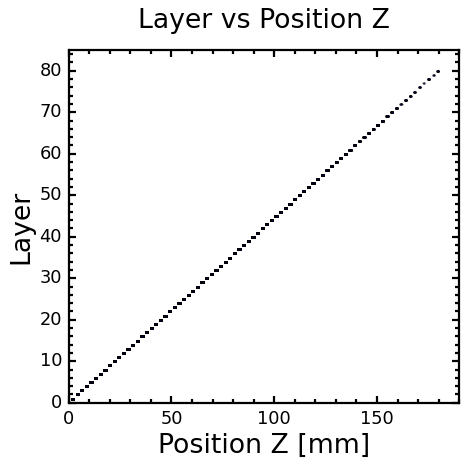

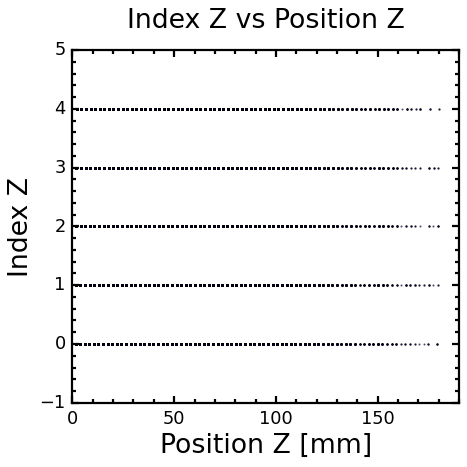

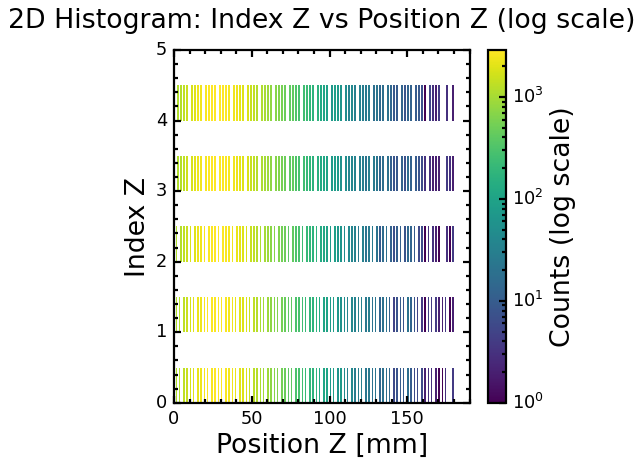

In [ ]:
#Z plot
all_layer_indexZ = np.concatenate([
    calo * 10 + idx_z
    for calo, idx_z in zip(calolayer_array, index_z_array)
])
all_layer = np.concatenate(calolayer_array)
all_index_x = np.concatenate(index_x_array)
all_index_y = np.concatenate(index_y_array)
all_index_z = np.concatenate(index_z_array)
all_pos_x = np.concatenate(pos_x)
all_pos_y = np.concatenate(pos_y)
all_pos_z = np.concatenate(pos_z)

plt.figure(figsize=fig_size)
plt.scatter(all_pos_z, all_layer, s=1, alpha=0.5)
plt.xlabel("Position Z [mm]")
plt.xlim(0, 190)
plt.ylabel("Layer")
plt.ylim(0, 85)
plt.title("Layer vs Position Z")
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=fig_size)
plt.scatter(all_pos_z, all_index_z, s=1, alpha=0.5)
plt.xlabel("Position Z [mm]")
plt.xlim(0, 190)
plt.ylabel("Index Z")
plt.ylim(-1, 5)
plt.title("Index Z vs Position Z")
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=fig_size)
plt.hist2d(all_pos_z, all_index_z, bins=[190, 10], range=[[0, 190], [0, 5]], cmap='viridis', norm=colors.LogNorm())
plt.colorbar(label='Counts (log scale)')
plt.xlabel("Position Z [mm]")
plt.ylabel("Index Z")
plt.title("2D Histogram: Index Z vs Position Z (log scale)")
plt.grid(False)
plt.tight_layout()
plt.show()

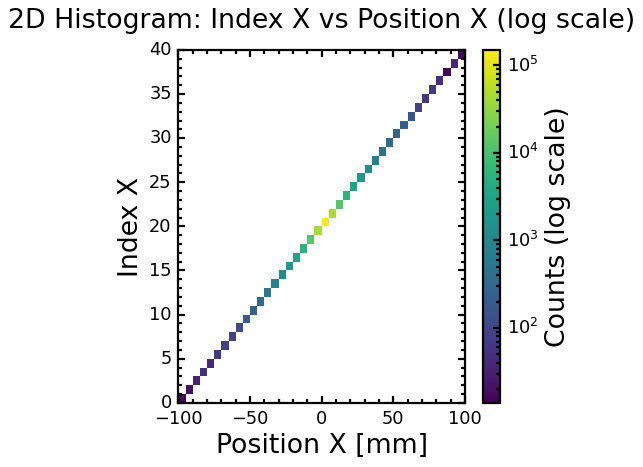

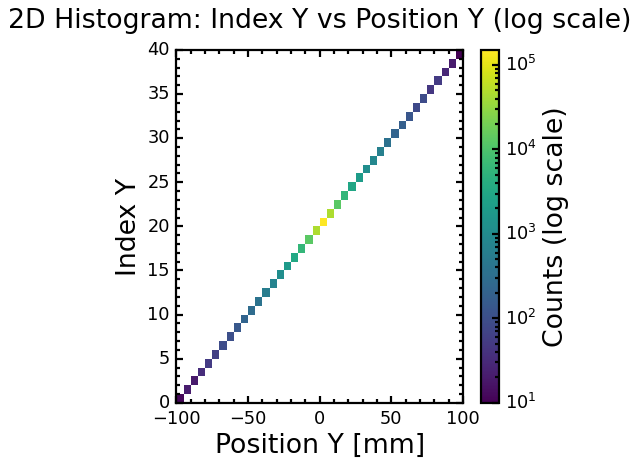

In [ ]:
#XY plot
all_layer = np.concatenate(calolayer_array)
all_index_x = np.concatenate(index_x_array)
all_index_y = np.concatenate(index_y_array)
all_index_z = np.concatenate(index_z_array)
all_pos_x = np.concatenate(pos_x)
all_pos_y = np.concatenate(pos_y)
all_pos_z = np.concatenate(pos_z)

plt.figure(figsize=fig_size)
plt.hist2d(all_pos_x, all_index_x, bins=[40, 40], range=[[-100, 100], [0, 40]], cmap='viridis', norm=colors.LogNorm())
plt.colorbar(label='Counts (log scale)')
plt.xlabel("Position X [mm]")
plt.ylabel("Index X")
plt.title("2D Histogram: Index X vs Position X (log scale)")
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=fig_size)
plt.hist2d(all_pos_y, all_index_y, bins=[40, 40], range=[[-100, 100], [0, 40]], cmap='viridis', norm=colors.LogNorm())
plt.colorbar(label='Counts (log scale)')
plt.xlabel("Position Y [mm]")
plt.ylabel("Index Y")
plt.title("2D Histogram: Index Y vs Position Y (log scale)")
plt.grid(False)
plt.tight_layout()
plt.show()


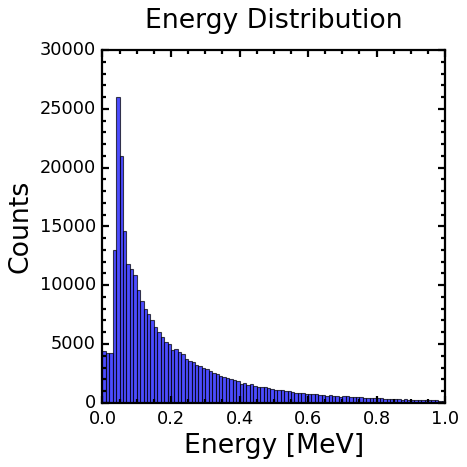

In [ ]:
all_energy = np.concatenate(energy) * 1000
plt.figure(figsize=fig_size)
plt.hist(all_energy, bins=100, range=[0, 1], color='blue', alpha=0.7)
plt.xlabel("Energy [MeV]")
plt.xlim(0, 1)
plt.ylabel("Counts")
plt.title("Energy Distribution")
plt.grid(False)
plt.tight_layout()
plt.show()